In [1]:
import   pandas  as  pd
import   numpy   as  np
import   seaborn as  sns
import   matplotlib.pyplot as plt ; plt.rcParams["font.family"] = "DejaVu Serif"
from     sklearn.metrics         import mean_squared_error, r2_score, mean_absolute_percentage_error, median_absolute_error
from     sklearn.model_selection import cross_val_score,GridSearchCV, train_test_split, RepeatedKFold
from     sklearn.preprocessing   import StandardScaler, MinMaxScaler
#from deepforest import CascadeForestRegressor


### some functions

In [2]:

"""
    Calculate Mean Squared Error (MSE) between true and predicted values.

    Parameters:
        -- y_true (numpy array or list): True values
        -- y_pred (numpy array or list): Predicted values

    Returns:
        -- mse (float): Mean Squared Error
    """

def mean_squared_error(y_true, y_pred):

    #convert then into umpy array if not already
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    #squared the differences
    squared_diff = (y_true - y_pred)**2
    #find the avg of squared_diff
    mse = np.mean(squared_diff)
    return mse


"""
    Calculate Root Mean Squared Error (RMSE) between true and predicted values.

    Parameters:
        -- y_true (numpy array or list): True values
        -- y_pred (numpy array or list): Predicted values

    Returns:
        -- mse (float): Mean Squared Error
    """

def root_mean_squared_error(y_true, y_pred):

    #convert then into umpy array if not already
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    #squared the differences
    squared_diff = (y_true - y_pred)**2
    #find the avg of squared_diff
    mse = np.mean(squared_diff)
    return np.sqrt(mse)



"""
    Calculate Mean Absolute Error (MAE) between true and predicted values.

    Parameters:
        -- y_true (numpy array or list): True values
        -- y_pred (numpy array or list): Predicted values

    Returns:
        -- mae (float): Mean Absolute Error
    """

def mean_absolute_error(y_true, y_pred):

    #convert then into umpy array if not already
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    #squared the differences
    absolute_diff = np.absolute(y_true - y_pred)
    #find the avg of squared_diff
    mae = np.mean(absolute_diff)
    return mae


"""
    Calculate R-squared value given predicted value and actual label

    Parameters:
        -- y_true (numpy array or list): True values
        -- y_pred (numpy array or list): Predicted values

    Returns:
        -- r^2 (float): Coefficient of determination(R^2)
    """

# def r2_score(y_true, y_pred):

#     #convert then into umpy array if not already
#     y_true = np.array(y_true)
#     y_pred = np.array(y_pred)
#     #sum of squared residuals
#     SSR = np.sum((y_true - y_pred)**2)
#     #sum of squared total
#     y_avg = np.mean(y_true)
#     SST = np.sum((y_avg-y_true)**2)
#     return 1 - (float(SSR)/float(SST))


"""
    Calculate Adjusted R-squared value given predicted and actual label and number of predictors

    Parameters:
        -- y_true (numpy array or list): True values
        -- y_pred (numpy array or list): Predicted values
        -- k (integer): Number of predictors

    Returns:
        -- adjusted r^2 (float): Coefficient of determination(R^2)
    """

def adjusted_r2_score(y_true, y_pred, k):

    #convert then into umpy array if not already
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    #number of observations
    n = len(y_true)
    #sum of squared residuals
    SSR = np.sum((y_true - y_pred)**2)
    #sum of squared total
    y_avg = np.mean(y_true)
    SST = np.sum((y_avg-y_true)**2)

    #r2_score
    r2_score = 1 - (float(SSR)/float(SST))
    #adjusted r2 square
    r2_score_adj = 1 - float((1-r2_score**2)*(n-1))/float(n - k - 1)

    return r2_score_adj

In [3]:
###  python== 3.9.13
### pandas==1.3.3 \    numpy==1.23.5  \ openpyxl==3.0.10  \  matplotlib==3.5.1
### xgboost==1.7.3 \ shap==0.45.0


# **PreProc**

## Loading data

In [3]:
data3 = pd.read_excel('../Data.xlsx')
data2 = data3.drop(columns=['CEC','HM','T', 'SA',	'Label','η','Ncharge'], axis=1)
print(data2.shape); data2.head(2)

(689, 15)


,pH_biochar,Ash,C_m,H_m,N_m,O_m,(O+N)/C,O/C,H/C,(H-O-2N)/C,pH_solution,C0,χ,r,RE
0,9.43,3.3,71.018233,15.873016,0.142786,5.43784,0.07858,0.07657,0.223506,0.068356,3.0,0.08,1.9,72,43.5
1,9.43,3.3,71.018233,15.873016,0.142786,5.43784,0.07858,0.07657,0.223506,0.068356,4.0,0.08,1.9,72,54.5


In [4]:
new_columns = {'pH_solution':'PHS', '(O+N)/C':'ONC','pH_biochar':'PHB','(H-O-2N)/C':'HO2NC'}
data2 = data2.rename(columns=new_columns)
print(data2.shape); data2.head(2)

(689, 15)


,PHB,Ash,C_m,H_m,N_m,O_m,ONC,O/C,H/C,HO2NC,PHS,C0,χ,r,RE
0,9.43,3.3,71.018233,15.873016,0.142786,5.43784,0.07858,0.07657,0.223506,0.068356,3.0,0.08,1.9,72,43.5
1,9.43,3.3,71.018233,15.873016,0.142786,5.43784,0.07858,0.07657,0.223506,0.068356,4.0,0.08,1.9,72,54.5


In [ ]:
## Find duplicate rows
duplicates = data2[data2.duplicated()]
## Display and drop the duplicate rows
print("number of duplicates shape:",duplicates.shape)
data_no_duplicates = data2.drop_duplicates()
print("data_no_duplicates shape:", data_no_duplicates.shape)
data_no_duplicates.head(2)

# data_no_duplicates = data2

In [ ]:
# # Get the category names corresponding to the numeric codes
# category_mapping = dict(enumerate(data_no_duplicates['HM'].astype('category').cat.categories))

# # View the mapping
# print(category_mapping)


In [ ]:
# from sklearn.preprocessing import OneHotEncoder
# ## Apply OneHotEncoder
# encoder = OneHotEncoder(sparse_output=False)
# encoded_data = encoder.fit_transform(data_no_duplicates[['HM']])

# ## Convert the result back to a DataFrame
# encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['HM']))
# print(encoded_data[:2]); print("encoded_df shape is:", encoded_df.shape)

# ## Drop the original 'Metal_type' column
# data = data_no_duplicates.drop('HM', axis=1)

# ## Concatenate the encoded columns with the original DataFrame
# data.reset_index(drop=True, inplace=True)
# encoded_df.reset_index(drop=True, inplace=True)

# data = pd.concat([data, encoded_df], axis=1)


# ## Ensure 'RE' is the last column
# columns = [col for col in data.columns if col != 'RE'] + ['RE']
# data = data[columns]

# ## Now 'data' contains the one-hot encoded columns, and 'AE' is the last column
# data = data.drop(columns=['O/C','ONC'], axis=1)
# print("\n", data.head(2)); print("data shape is:", data.shape)

# Get rows with NaN
# rows_with_nan = data[data.isna().any(axis=1)]
# print(rows_with_nan)

In [ ]:
# Get rows with NaN
rows_with_nan = data_no_duplicates[data_no_duplicates.isna().any(axis=1)]
print(rows_with_nan)


In [ ]:
# # Get category names corresponding to the numeric codes
# categories = encoder.categories_[0]  # Since we're encoding just one column ('Metal_type')

# # Print the category names
# print("Category names:", categories)

In [ ]:
inputs = data_no_duplicates.iloc[:,:-1]
output = data_no_duplicates.iloc[:,-1]
print(inputs.shape)
inputs.head()

# Cd2+ = [0.0000	1.0000	0.0000	0.0000	0.0000	0.0000]
# Cu2+ = [0.0000	0.0000	1.0000	0.0000	0.0000	0.0000]
# Pb2+ = [0.0000	0.0000	0.0000	0.0000	1.0000	0.0000]
# Zn2+ = [0.0000	0.0000	0.0000	0.0000	0.0000	1.0000]
# As3+ = [1.0000	0.0000	0.0000	0.0000	0.0000	0.0000]
# Ni2+ = [0.0000	0.0000	0.0000	1.0000	0.0000	0.0000]


In [ ]:
output.describe()

In [ ]:
output.head(3)

In [ ]:
pd.options.display.float_format = '{:,.4f}'.format
inputs.iloc[:,:-6].describe()

In [ ]:
print(inputs.dtypes)
# print(inputs['C0'].unique())
# Get the unique values in the 'C0' column
unique_values = inputs['C0'].unique()

# Loop through the unique values and find their indices
for value in unique_values:
    indices = inputs[inputs['C0'] == value].index
    # print(f"Value: {value} - Indices: {indices.tolist()}")


In [ ]:
### corr = data_mod_lc.drop('RE (%)', axis=1).corr() # examining correlations

### Plotting correlation above or below 0.5
### df = data.drop(columns=['Zinc', 'Cadmium', 'Arsenic'], axis=1)

### new_columns = {'Siq (MPa)':'CSR', 'Hs (m)':'PLS','Hr (m)':'PLR','B (m)':'PD' }
### df = data.rename(columns=new_columns)

# corr = data.iloc[:,:-1].corr()

# plt.rcParams["font.family"] = "DejaVu Serif"

# plt.figure(figsize=(12, 10))

# sns.heatmap(corr[(corr >= 0.0) | (corr <= -0.0)],
#             cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
#             annot=True, annot_kws={"size": 8}, square=True);
# plt.tight_layout()
# plt.savefig('./Res/Figs/corrEL_2.pdf', dpi=600, bbox_inches='tight', format = 'pdf')
# plt.show()

## Split and Save

### IsolationForest

In [ ]:
from sklearn.ensemble import IsolationForest
import pandas as pd

## Assuming 'data_no_duplicates' is DataFrame and you want to remove rows with outliers

## Define the IsolationForest model
iso_forest = IsolationForest(random_state=42)  # Adjust contamination based on expected outlier percentage

## Fit the model and predict outliers
aaaaa = pd.DataFrame(data_no_duplicates)
aaaaa.to_excel('./TTV/data_with_outliers.xlsx', index= False)
isodata = iso_forest.fit_predict(data_no_duplicates)

## Filter out outliers (outliers will have a label of -1)
data_no_outliers = data_no_duplicates[isodata != -1]

In [ ]:
inputs = data_no_outliers.iloc[:,:-1]
output = data_no_outliers.iloc[:,-1]
print(inputs.shape)
inputs.head(3)

# aaaaa = pd.DataFrame(data_no_outliers)
# aaaaa.to_excel('./TTV/withoutOutlier/data_no_outliers.xlsx', index= False)

### Train_Test_Split

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# 1. Separate your data (as you already have)
# Note: Ensure 'Label' is dropped first if it's still in the inputs, 
# as scalers only work on numbers.

# inputs = data_no_outliers.iloc[:, :-1] # Assuming Label is the 2nd to last column
# output = data_no_outliers.iloc[:, -1]
inputs = data_no_duplicates.iloc[:,:-1]
output = data_no_duplicates.iloc[:,-1]


# 2. Initialize the scalers
scaler_in = MinMaxScaler(feature_range=(0, 1))
scaler_out = MinMaxScaler(feature_range=(0, 1))

# 3. Scale the Inputs
# This returns a numpy array. We convert back to DataFrame to keep column names.
inputs_scaled = pd.DataFrame(
    scaler_in.fit_transform(inputs), 
    columns=inputs.columns
)

# 4. Scale the Output
# Scikit-learn expects a 2D array for the output, so we use .values.reshape(-1, 1)
output_scaled = scaler_out.fit_transform(output.values.reshape(-1, 1))

# Flatten it back to a 1D array/series for the regression model
output_scaled = output_scaled.flatten()

# --- Verification ---
print(f"Input Max: {inputs_scaled.max().max()}") # Should be 1.0
print(f"Output Max: {output_scaled.max()}")      # Should be 1.0


trainx1, testx1, trainy1, testy1= train_test_split(inputs_scaled, output_scaled, test_size=0.2, random_state=22 , shuffle=True)

# trainx1, testx1, trainy1, testy1= train_test_split(inputs, output, test_size=0.2, random_state=22 , shuffle=True)

In [ ]:
trainx1

In [ ]:
# aaaaa = pd.DataFrame(trainx1)
# aaaaa.to_excel('./TTV/withoutOutlier/trainx.xlsx', index= False)
# bbbb = pd.DataFrame(trainy1)
# bbbb.to_excel('./TTV/withoutOutlier/trainy.xlsx', index= False)

# aaaaa = pd.DataFrame(testx1)
# aaaaa.to_excel('./TTV/withoutOutlier/testx.xlsx', index= False)
# bbbb = pd.DataFrame(testy1)
# bbbb.to_excel('./TTV/withoutOutlier/testy.xlsx')

trainx2 = pd.read_excel('./TTV/withoutOutlier/trainx.xlsx')
trainy2 = pd.read_excel('./TTV/withoutOutlier/trainy.xlsx')
testx2 = pd.read_excel('./TTV/withoutOutlier/testx.xlsx')
testy2 = pd.read_excel('./TTV/withoutOutlier/testy.xlsx')


# testy2 = testy2.iloc[:,1]
# trainy2 = trainy2.iloc[:,1]

# trainx2 = trainx2.iloc[:,1:]
# testx2 = testx2.iloc[:,1:]

# x_train = trainx2.to_numpy()
# x_test =  testx2.values.astype(np.float64)

# y_test  = testy2
# y_train = trainy2


In [ ]:
# aaaaa = pd.DataFrame(trainx1)
# aaaaa.to_excel('./TTV/trainx.xlsx', index= False)
# bbbb = pd.DataFrame(trainy1)
# bbbb.to_excel('./TTV/trainy.xlsx', index= False)

# aaaaa = pd.DataFrame(testx1)
# aaaaa.to_excel('./TTV/testx.xlsx', index= False)
# bbbb = pd.DataFrame(testy1)
# bbbb.to_excel('./TTV/testy.xlsx')

trainx2 = pd.read_excel('./TTV/trainx.xlsx')
trainy2 = pd.read_excel('./TTV/trainy.xlsx')
testx2 = pd.read_excel('./TTV/testx.xlsx')
testy2 = pd.read_excel('./TTV/testy.xlsx')


# testy2 = testy2.iloc[:,1]
# trainy2 = trainy2.iloc[:,1]

# trainx2 = trainx2.iloc[:,1:]
# testx2 = testx2.iloc[:,1:]

# x_train = trainx2.to_numpy()
# x_test =  testx2.values.astype(np.float64)

# y_test  = testy2
# y_train = trainy2


### GAnetwork

In [ ]:
# train a generative adversarial network on a one-dimensional function
from numpy import hstack
from numpy import zeros
from numpy import ones
from numpy.random import rand
from numpy.random import randn
from keras.models import Sequential
from keras.layers import Dense, Input
from matplotlib import pyplot

# define the standalone discriminator model
def define_discriminator(n_inputs=2):
    model = Sequential()
    model.add(Input(shape=(n_inputs,)))
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(60, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(20, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(1, activation='sigmoid'))
    # compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# define the standalone generator model
def define_generator(latent_dim, n_outputs=2):
    model = Sequential()
    model.add(Input(shape=(latent_dim,)))
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(60, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(20, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(n_outputs, activation='linear'))
    return model

# define the combined generator and discriminator model, for updating the generator
def define_gan(generator, discriminator):
    # make weights in the discriminator not trainable
    discriminator.trainable = False
    # connect them
    model = Sequential()
    # add generator
    model.add(generator)
    # add the discriminator
    model.add(discriminator)
    # compile model
    model.compile(loss='binary_crossentropy', optimizer='adam')
    return model

# generate n real samples with class labels
def generate_real_samples(n):
    # # generate inputs in [-0.5, 0.5]
    # X1 = rand(n) - 0.5
    # # generate outputs X^2
    # X2 = X1 * X1
    # # stack arrays
    # X1 = X1.reshape(n, 1)
    # X2 = X2.reshape(n, 1)
    # X = hstack((X1, X2))
    # # generate class labels
    # y = ones((n, 1))
    X = XN
    y = YN

    return X, y

# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n):
    # generate points in the latent space
    x_input = randn(latent_dim * n)
    # reshape into a batch of inputs for the network
    x_input = x_input.reshape(n, latent_dim)
    return x_input

# use the generator to generate n fake examples, with class labels
def generate_fake_samples(generator, latent_dim, n):
    # generate points in latent space
    x_input = generate_latent_points(latent_dim, n)
    # predict outputs
    X = generator.predict(x_input)
    # create class labels
    y = zeros((n, 1))
    return X, y

# evaluate the discriminator and plot real and fake points
def summarize_performance(epoch, generator, discriminator, latent_dim, n=100):
    # prepare real samples
    x_real, y_real = generate_real_samples(n)
    # evaluate discriminator on real examples
    _, acc_real = discriminator.evaluate(x_real, y_real, verbose=0)
    # prepare fake examples
    x_fake, y_fake = generate_fake_samples(generator, latent_dim, n)
    # evaluate discriminator on fake examples
    _, acc_fake = discriminator.evaluate(x_fake, y_fake, verbose=0)
    # summarize discriminator performance
    print(epoch, acc_real, acc_fake)
    # scatter plot real and fake data points
    pyplot.scatter(x_real[:, 0], x_real[:, 1], color='red')
    pyplot.scatter(x_fake[:, 0], x_fake[:, 1], color='blue')
    pyplot.show()

# train the generator and discriminator
def train(g_model, d_model, gan_model, latent_dim, n_epochs=10000, n_batch=128, n_eval=2000):
    # determine half the size of one batch, for updating the discriminator
    half_batch = int(n_batch / 2)
    # manually enumerate epochs
    for i in range(n_epochs):
        # prepare real samples
        x_real, y_real = generate_real_samples(half_batch) 
        # prepare fake examples
        x_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch) 
        # update discriminator
        d_model.train_on_batch(x_real, y_real, verbose=0) 
        d_model.train_on_batch(x_fake, y_fake, verbose=0) 
        # prepare points in latent space as input for the generator
        x_gan = generate_latent_points(latent_dim, n_batch) 
        # create inverted labels for the fake samples
        y_gan = ones((n_batch, 1))
        # update the generator via the discriminator's error
        gan_model.train_on_batch(x_gan, y_gan, verbose=0) 
        # evaluate the model every n_eval epochs
        # if (i+1) % n_eval == 0:
            #summarize_performance(i, g_model, d_model, latent_dim)

# size of the latent space
latent_dim = 19
# create the discriminator
discriminator = define_discriminator()
# create the generator
generator = define_generator(latent_dim)
# create the gan
gan_model = define_gan(generator, discriminator)
# train model
train(generator, discriminator, gan_model, latent_dim)

# **Models**

## C1 without outlier

#### load data

In [ ]:
trainx2 = pd.read_excel('./TTV/withoutOutlier/trainx.xlsx')
trainy2 = pd.read_excel('./TTV/withoutOutlier/trainy.xlsx')
testx2 = pd.read_excel('./TTV/withoutOutlier/testx.xlsx')
testy2 = pd.read_excel('./TTV/withoutOutlier/testy.xlsx')
trainy2

In [ ]:
trainx = pd.read_excel('./TTV/withoutOutlier/trainx.xlsx')
trainy = pd.read_excel('./TTV/withoutOutlier/trainy.xlsx').values.ravel()
testx = pd.read_excel('./TTV/withoutOutlier/testx.xlsx')
testy = pd.read_excel('./TTV/withoutOutlier/testy.xlsx').values.ravel()
trainx

In [ ]:
trainy.shape

### KAN


>>> Initializing KAN [14, 8, 1]...
checkpoint directory created: ./model
saving model version 0.0
>>> Stage 1: Adam Warmup (Grid 3)


| train_loss: 2.91e-01 | test_loss: 2.96e-01 | reg: 2.77e+02 | : 100%|█| 300/300 [00:02<00:00, 134.6


saving model version 0.1
>>> Stage 2: Grid Extension (Grid 10)
saving model version 0.2


| train_loss: 2.09e-01 | test_loss: 4.25e-01 | reg: 8.29e+02 | : 100%|█| 300/300 [00:02<00:00, 108.0


saving model version 0.3
>>> Stage 3: LBFGS Precision Tuning (Grid 20)
saving model version 0.4


| train_loss: 9.08e-02 | test_loss: 1.32e-01 | reg: 4.64e+01 | : 100%|█| 100/100 [00:18<00:00,  5.46


saving model version 0.5
>>> Stage 4: Pruning
saving model version 0.6


| train_loss: 6.40e-02 | test_loss: 1.24e-01 | reg: 4.75e+01 | : 100%|█| 50/50 [00:08<00:00,  6.02it


saving model version 0.7
>>> Model saved to ./Res/kan

================ FINAL RESULTS ================
Train R² : 0.9623
Test  R² : 0.9004


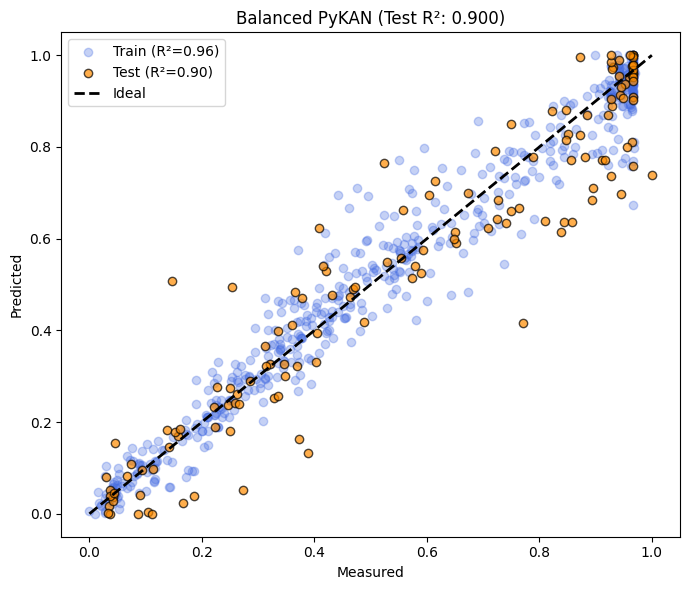

fixing (0,0,4) with 0
fixing (0,0,5) with 0
fixing (0,1,3) with 0
fixing (0,1,4) with 0
fixing (0,1,5) with 0
fixing (0,2,0) with 0
fixing (0,2,1) with 0
fixing (0,2,2) with 0
fixing (0,2,4) with 0
fixing (0,2,5) with 0
fixing (0,3,2) with 0
fixing (0,3,3) with 0
fixing (0,3,4) with 0
fixing (0,3,5) with 0
fixing (0,3,6) with 0
fixing (0,4,0) with 0
fixing (0,4,4) with 0
fixing (0,4,5) with 0
fixing (0,4,6) with 0
fixing (0,5,1) with 0
fixing (0,5,4) with 0
fixing (0,5,5) with 0
fixing (0,5,6) with 0
fixing (0,6,0) with 0
fixing (0,6,1) with 0
fixing (0,6,4) with 0
fixing (0,6,5) with 0
fixing (0,6,6) with 0
fixing (0,7,1) with 0
fixing (0,7,3) with 0
fixing (0,7,4) with 0
fixing (0,7,5) with 0
fixing (0,7,6) with 0
fixing (0,8,1) with 0
fixing (0,8,2) with 0
fixing (0,8,4) with 0
fixing (0,8,5) with 0
fixing (0,9,2) with 0
fixing (0,9,4) with 0
fixing (0,10,1) with 0
fixing (0,10,4) with 0
fixing (0,11,1) with 0
fixing (0,11,2) with 0
fixing (0,11,3) with 0
fixing (0,11,4) with 0
fixi

In [ ]:
# import pandas as pd
# import numpy as np
# import os
# import torch
# import matplotlib.pyplot as plt
# from kan import KAN
# from sklearn.metrics import r2_score
# from sklearn.preprocessing import StandardScaler, MinMaxScaler
# import warnings

# warnings.filterwarnings("ignore")

# # ---------------------------------------------------------
# # 1. PATHS & LOADING
# # ---------------------------------------------------------
# save_path = r'./Res/kan'
# os.makedirs(save_path, exist_ok=True)

# def load_clean(path):
#     df = pd.read_excel(path).dropna(how='all')
#     return df.apply(pd.to_numeric, errors='coerce').dropna()

# trainx_df = load_clean('./TTV/trainx.xlsx')
# trainy_df = load_clean('./TTV/trainy.xlsx')
# testx_df  = load_clean('./TTV/testx.xlsx')
# testy_df  = load_clean('./TTV/testy.xlsx')

# # ---------------------------------------------------------
# # 2. HYBRID PREPROCESSING
# # ---------------------------------------------------------
# # StandardScaler for inputs (handles different units better)
# scaler_x = StandardScaler()
# # MinMaxScaler for output (keeps target in 0-1 range)
# scaler_y = MinMaxScaler(feature_range=(0, 1))

# X_train_s = scaler_x.fit_transform(trainx_df.values)
# y_train_s = scaler_y.fit_transform(trainy_df.values.reshape(-1, 1))
# X_test_s  = scaler_x.transform(testx_df.values)
# y_test_s  = scaler_y.transform(testy_df.values.reshape(-1, 1))

# dataset = {
#     'train_input': torch.tensor(X_train_s, dtype=torch.float32),
#     'train_label': torch.tensor(y_train_s, dtype=torch.float32),
#     'test_input':  torch.tensor(X_test_s,  dtype=torch.float32),
#     'test_label':  torch.tensor(y_test_s,  dtype=torch.float32)
# }

# d = X_train_s.shape[1]

# # ---------------------------------------------------------
# # 3. MODEL DEFINITION (Single Hidden Layer - High Stability)
# # ---------------------------------------------------------
# print(f"\n>>> Initializing KAN [{d}, 8, 1]...")
# # A single wide layer (8) is often better than two thin layers
# model = KAN(width=[d, 8, 1], grid=3, k=3, seed=40)

# # ---------------------------------------------------------
# # 4. BALANCED TRAINING STRATEGY
# # ---------------------------------------------------------

# # Stage 1: Warmup with very coarse grid
# print(">>> Stage 1: Adam Warmup (Grid 3)")
# model.fit(dataset, opt="Adam", steps=300, lamb=0.002)

# # Stage 2: Increase resolution
# print(">>> Stage 2: Grid Extension (Grid 10)")
# model = model.refine(10)
# model.fit(dataset, opt="Adam", steps=300, lamb=0.002)

# # Stage 3: Fine Tuning with LBFGS
# print(">>> Stage 3: LBFGS Precision Tuning (Grid 20)")
# model = model.refine(20)
# model.fit(dataset, opt="LBFGS", steps=100, lamb=0.001, update_grid=False)

# # Stage 4: Pruning
# print(">>> Stage 4: Pruning")
# model = model.prune()
# # Final polish after pruning
# model.fit(dataset, opt="LBFGS", steps=50, update_grid=False)

# # ---  SAVE THE WINNING MODEL ---
# model_save_name = 'Winning_KAN_R2_90.pth'
# torch.save(model.state_dict(), os.path.join(save_path, model_save_name))
# print(f">>> Model saved to {save_path}")

# # ---------------------------------------------------------
# # 5. EVALUATION
# # ---------------------------------------------------------
# y_train_pred_s = model(dataset['train_input']).detach().numpy()
# y_test_pred_s  = model(dataset['test_input']).detach().numpy()

# y_train_pred = scaler_y.inverse_transform(y_train_pred_s).ravel()
# y_test_pred  = scaler_y.inverse_transform(y_test_pred_s).ravel()
# y_train_real = scaler_y.inverse_transform(y_train_s).ravel()
# y_test_real  = scaler_y.inverse_transform(y_test_s).ravel()

# # Clip predictions to 0-1 range to handle spline overshoots
# y_train_pred = np.clip(y_train_pred, 0, 1)
# y_test_pred = np.clip(y_test_pred, 0, 1)

# r2_train = r2_score(y_train_real, y_train_pred)
# r2_test  = r2_score(y_test_real,  y_test_pred)
# pd.DataFrame(y_train_pred).to_csv(f"{save_path}/kan_train.csv", index=False)
# pd.DataFrame(y_test_pred).to_csv(f"{save_path}/kan_test.csv", index=False)

# print(f"\n================ FINAL RESULTS ================")
# print(f"Train R² : {r2_train:.4f}")
# print(f"Test  R² : {r2_test:.4f}")

# # ---------------------------------------------------------
# # 6. PLOTTING
# # ---------------------------------------------------------
# plt.figure(figsize=(7, 6))
# plt.scatter(y_train_real, y_train_pred, alpha=0.3, label=f'Train (R²={r2_train:.2f})', color='royalblue')
# plt.scatter(y_test_real, y_test_pred, alpha=0.7, edgecolors='k', label=f'Test (R²={r2_test:.2f})', color='darkorange')
# plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Ideal')
# plt.xlabel('Measured')
# plt.ylabel('Predicted')
# plt.title(f'Balanced PyKAN (Test R²: {r2_test:.3f})')
# plt.legend()
# plt.tight_layout()
# plt.show()

# # 7. Symbolic Formula
# try:
#     model.auto_symbolic(lib=['x', 'x^2', 'exp', 'sin'], verbose=False)
#     formula = model.symbolic_formula()[0][0]
#     print("\nExtracted Equation:\n", formula)
# except:
#     print("\nVisualizing via model.plot()...")
#     model.plot()


In [ ]:
 ## final Eq of kan: -0.0126355848361681*x_1 + 0.0944263711525215*x_10 - 0.00775054464843849*x_11 - 0.0255573667351985*x_12 + 0.00205512925961441*x_2 + 0.0253653516117779*x_3 - 0.000258298124281269*x_4 - 0.0159053191934413*x_5 + 0.0146443538910191*x_6 + 0.0234286137423573*x_7 + 0.0336717732009698*x_8 - 0.0576092851330215*x_9 + 0.0184292969049286*sin(1.71839988231659*x_13 - 1.00767982006073) - 0.129407248720257*sin(8.62823963165283*x_14 + 5.79752016067505) + 0.200594641984015*sin(0.502719819545746*x_2 + 5.02071952819824) - 2.22064185142517*sin(0.00689399880140926*x_10 + 0.0162369808111107*x_11 - 5.79448079419154) + 2.41122508049011*sin(0.00458119437722192*x_1 + 0.0529386330349646*x_11 - 0.0770206440181543*x_12 + 0.0589324691996066*x_2 + 0.0767274288857335*x_4 - 0.0216004123722829*x_6 + 0.0169914266806786*x_8 - 0.020253153543463*x_9 + 1.32453742875402*sin(0.285119950771332*x_10 + 1.89615988731384) - 0.151877660252477*sin(2.60679984092712*x_13 - 7.18527984619141) + 0.0909475323038156*sin(4.65903997421265*x_14 + 7.39831972122192) - 20.7172995322285) + 3.17102001634771
 ## final Eq of kan: -0.0126355848361681*x_1 + 0.0944263711525215*x_10 - 0.00775054464843849*x_11 - 0.0255573667351985*x_12 + 0.00205512925961441*x_2 + 0.0253653516117779*x_3 - 0.000258298124281269*x_4 - 0.0159053191934413*x_5 + 0.0146443538910191*x_6 + 0.0234286137423573*x_7 + 0.0336717732009698*x_8 - 0.0576092851330215*x_9 + 0.0184292969049286*sin(1.71839988231659*x_13 - 1.00767982006073) - 0.129407248720257*sin(8.62823963165283*x_14 + 5.79752016067505) + 0.200594641984015*sin(0.502719819545746*x_2 + 5.02071952819824) - 2.22064185142517*sin(0.00689399880140926*x_10 + 0.0162369808111107*x_11 - 5.79448079419154) + 2.41122508049011*sin(0.00458119437722192*x_1 + 0.0529386330349646*x_11 - 0.0770206440181543*x_12 + 0.0589324691996066*x_2 + 0.0767274288857335*x_4 - 0.0216004123722829*x_6 + 0.0169914266806786*x_8 - 0.020253153543463*x_9 + 1.32453742875402*sin(0.285119950771332*x_10 + 1.89615988731384) - 0.151877660252477*sin(2.60679984092712*x_13 - 7.18527984619141) + 0.0909475323038156*sin(4.65903997421265*x_14 + 7.39831972122192) - 20.7172995322285) + 3.17102001634771


### PySr

>>> Loading data...
Sanitized features: ['PHB', 'Ash', 'C_m', 'H_m', 'N_m', 'O_m', 'ONC', 'O_div_C', 'H_div_C', 'HO2NC', 'PHS', 'C0', 'chi', 'r']

>>> Running PySR...


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(



🔥 BEST SYMBOLIC REGRESSION MODEL 🔥
Train R² : 0.64622
Test  R² : 0.72157
Train RMSE : 0.18944
Test  RMSE : 0.17473

Equation:
abs(0.0845557 - ((((PHS * (((N_m * chi) + (((PHS + O_div_C) - chi) * Ash)) * C_m)) ^ 0.18969265) * (((r * 0.025019418) ^ C0) + 0.53521854)) ^ 1.2265959))


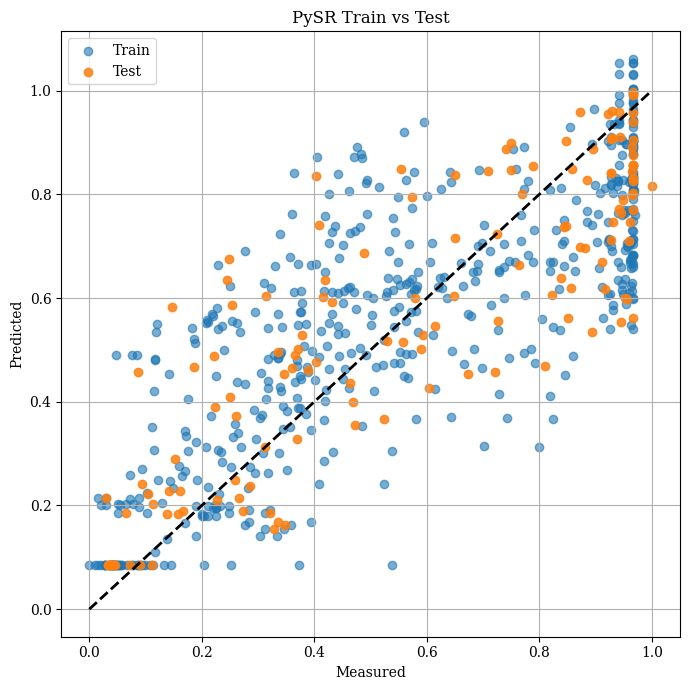


>>> SUCCESS — results saved to: ./Res/pysr/2


In [ ]:
#  # =========================
# # 1. IMPORTS
# # =========================
# import ssl
# ssl._create_default_https_context = ssl._create_unverified_context
# import os

# # Set Julia executable path
# os.environ["JULIA_EXE"] = "/Users/imsb1372/.juliaup/bin/julia"

# from pysr import PySRRegressor

# import numpy as np
# import pandas as pd
# import os
# import re
# import matplotlib.pyplot as plt
# from pysr import PySRRegressor
# from sklearn.metrics import r2_score, mean_squared_error

# # =========================
# # 2. PATH SETUP
# # =========================
# save_path = "./Res/pysr"
# os.makedirs(save_path, exist_ok=True)

# # =========================
# # 3. DATA LOADING & CLEANING
# # =========================
# def load_clean(path):
#     if not os.path.exists(path):
#         raise FileNotFoundError(f"File not found: {path}")
#     return (
#         pd.read_excel(path)
#         .dropna(how="all")
#         .apply(pd.to_numeric, errors="coerce")
#         .dropna()
#     )

# print(">>> Loading data...")
# X_train = load_clean('./TTV/trainx.xlsx')
# y_train = load_clean('./TTV/trainy.xlsx').values.ravel()
# X_test  = load_clean('./TTV/testx.xlsx')
# y_test  = load_clean('./TTV/testy.xlsx').values.ravel()

# # Align lengths
# n_train = min(len(X_train), len(y_train))
# X_train, y_train = X_train.iloc[:n_train], y_train[:n_train]
# n_test = min(len(X_test), len(y_test))
# X_test, y_test = X_test.iloc[:n_test], y_test[:n_test]

# # =========================
# # 4. COLUMN SANITIZATION
# # =========================
# def sanitize_columns(df):
#     cols = []
#     for c in df.columns:
#         name = str(c)
#         name = name.replace("χ", "chi").replace("/", "_div_").replace("%", "pct")
#         name = re.sub(r"[^A-Za-z0-9_]", "_", name)
#         name = re.sub(r"_+", "_", name).strip("_")
#         if not name[0].isalpha():
#             name = "v_" + name
#         cols.append(name)
#     df.columns = cols
#     return df

# X_train = sanitize_columns(X_train)
# X_test  = sanitize_columns(X_test)
# print("Sanitized features:", list(X_train.columns))

# # =========================
# # 5. PySR CONFIGURATION
# # =========================
# print("\n>>> Running PySR...")

# model = PySRRegressor(
#     niterations=500,
#     populations=50,
#     binary_operators=["+", "-", "*", "/", "^"],
#     unary_operators=["sqrt", "log", "square", "abs", "exp"],
#     constraints={
#         "^": (-1, 1),
#         "sqrt": 5,
#         "log": 5
#     },
#     model_selection="accuracy",
#     parsimony=0.0,
#     maxsize=30,
#     warm_start=True,
#     temp_equation_file=True,
#     tempdir=save_path,
#     verbosity=0        # 🔇 TURN OFF ALL PROGRESS OUTPUT

# )

# # =========================
# # 6. FIT MODEL
# # =========================
# model.fit(X_train, y_train)

# # =========================
# # 7. GET BEST MODEL (CORRECT WAY)
# # =========================
# best_row = model.get_best()

# # =========================
# # 8. PREDICTIONS (NO row= ❗)
# # =========================
# y_train_pred = model.predict(X_train)
# y_test_pred  = model.predict(X_test)

# pd.DataFrame(y_train_pred).to_csv(f"{save_path}/pysr_train.csv", index=False)
# pd.DataFrame(y_test_pred).to_csv(f"{save_path}/pysr_test.csv", index=False)
# # =========================
# # 9. METRICS
# # =========================
# r2_train = r2_score(y_train, y_train_pred)
# r2_test  = r2_score(y_test, y_test_pred)
# rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
# rmse_test  = np.sqrt(mean_squared_error(y_test, y_test_pred))

# print("\n" + "="*70)
# print("🔥 BEST SYMBOLIC REGRESSION MODEL 🔥")
# print(f"Train R² : {r2_train:.5f}")
# print(f"Test  R² : {r2_test:.5f}")
# print(f"Train RMSE : {rmse_train:.5f}")
# print(f"Test  RMSE : {rmse_test:.5f}")
# print("\nEquation:")
# print(best_row.equation)
# print("="*70)

# # =========================
# # 10. PLOT
# # =========================
# plt.figure(figsize=(7, 7))
# plt.scatter(y_train, y_train_pred, alpha=0.6, label="Train")
# plt.scatter(y_test, y_test_pred, alpha=0.85, label="Test")

# mn = min(y_train.min(), y_test.min())
# mx = max(y_train.max(), y_test.max())
# plt.plot([mn, mx], [mn, mx], "k--", lw=2)

# plt.xlabel("Measured")
# plt.ylabel("Predicted")
# plt.title("PySR Train vs Test")
# plt.legend()
# plt.grid(True)
# plt.tight_layout()
# plt.savefig(os.path.join(save_path, "PySR_Train_vs_Test.png"), dpi=600)
# plt.show()

# # =========================
# # 11. SAVE RESULTS
# # =========================
# results_df = pd.DataFrame([{
#     "R2_Train": r2_train,
#     "R2_Test": r2_test,
#     "RMSE_Train": rmse_train,
#     "RMSE_Test": rmse_test,
#     "Equation": str(best_row.equation),
#     "SymPy": str(best_row.sympy_format)
# }])

# results_df.to_excel(os.path.join(save_path, "PySR_Final_Results.xlsx"), index=False)
# model.equations_.to_excel(os.path.join(save_path, "PySR_All_Equations.xlsx"), index=False)

# print(f"\n>>> SUCCESS — results saved to: {save_path}")


### Pysindy

✅ Data Ready: 551 train / 138 test samples

>>> Discovering Parsimonious Equation via PySINDy...

================ MODEL PERFORMANCE ================
Train R²   : 0.79680
Test  R²   : 0.72959
Train RMSE: 0.14357
Test  RMSE: 0.17220

FINAL DISCOVERED EQUATION:
RE = (-1953.6288 * 1) + (-139.7731 * PHB) + (3433.0703 * Ash) + (3002.8434 * C_m) + (255.5161 * H_m) + (-52.9542 * N_m) + (1667.8269 * O_m) + (1358.3115 * ONC) + (-693.7389 * O/C) + (261.4912 * H/C) + (25.6777 * PHS) + (-16.1377 * C0) + (-17.5899 * χ) + (32.4737 * r) + (2.9854 * PHB^2) + (142.8227 * PHB Ash) + (147.8956 * PHB C_m) + (-32.8793 * PHB H_m) + (86.8257 * PHB O_m) + (5.2852 * PHB ONC) + (-91.9648 * PHB O/C) + (72.8283 * PHB H/C) + (-26.4436 * PHB HO2NC) + (0.4687 * PHB PHS) + (-1.6474 * PHB C0) + (-1.5810 * PHB χ) + (0.1623 * PHB r) + (-2083.3409 * Ash^2) + (-3729.1680 * Ash C_m) + (-73.0829 * Ash H_m) + (-82.8191 * Ash N_m) + (-2590.5439 * Ash O_m) + (124.0485 * Ash ONC) + (2357.5502 * Ash O/C) + (-679.5980 * Ash H/C) 

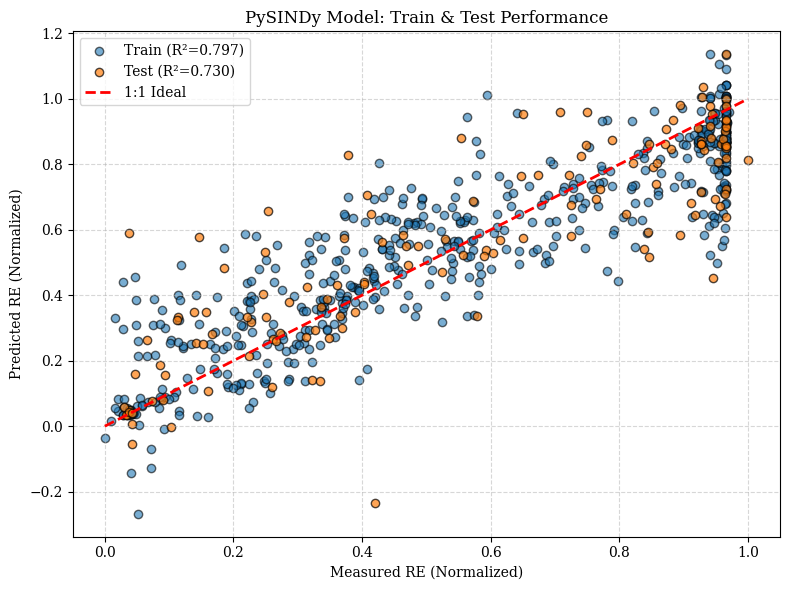


✅ Done! Results saved to:
./Res/pysindy


In [ ]:
# import pandas as pd
# import numpy as np
# import os
# import matplotlib.pyplot as plt
# import seaborn as sns
# import pysindy as ps  #pip install scikit-learn==1.6.1
# from sklearn.metrics import r2_score, mean_squared_error
# import warnings

# warnings.filterwarnings("ignore")

# # --- 1. SETUP PATHS AND DATA ---
# save_path = r'./Res/pysindy'
# os.makedirs(save_path, exist_ok=True)

# def load_clean(path):
#     return (
#         pd.read_excel(path)
#         .dropna(how='all')
#         .apply(pd.to_numeric, errors='coerce')
#         .dropna()
#     )

# try:
#     trainx_df = load_clean('./TTV/trainx.xlsx')
#     trainy_df = load_clean('./TTV/trainy.xlsx')
#     testx_df  = load_clean('./TTV/testx.xlsx')
#     testy_df  = load_clean('./TTV/testy.xlsx')

#     train_len = min(len(trainx_df), len(trainy_df))
#     test_len  = min(len(testx_df), len(testy_df))

#     X_train = trainx_df.iloc[:train_len].values
#     y_train = trainy_df.iloc[:train_len].values.reshape(-1, 1)

#     X_test = testx_df.iloc[:test_len].values
#     y_test = testy_df.iloc[:test_len].values.ravel()

#     feature_names = list(trainx_df.columns)

#     print(f"✅ Data Ready: {X_train.shape[0]} train / {X_test.shape[0]} test samples")

# except Exception as e:
#     raise RuntimeError(f"❌ Data Error: {e}")

# # --- 2. CONFIGURE PYSINDY ---
# library = ps.PolynomialLibrary(degree=2, include_interaction=True)
# optimizer = ps.STLSQ(threshold=0.01)

# model = ps.SINDy(
#     feature_library=library,
#     optimizer=optimizer
# )

# # --- 3. FIT MODEL ---
# print("\n>>> Discovering Parsimonious Equation via PySINDy...")
# model.fit(X_train, t=1, x_dot=y_train, feature_names=feature_names)
# #model.fit(X_train, t=1, feature_names=feature_names)

# # --- 4. PREDICTIONS ---
# y_train_pred = model.predict(X_train).ravel()
# y_test_pred  = model.predict(X_test).ravel()

# pd.DataFrame(y_train_pred).to_csv(f"{save_path}/pysindy_train.csv", index=False)
# pd.DataFrame(y_test_pred).to_csv(f"{save_path}/pysindy_test.csv", index=False)


# # --- 5. METRICS ---
# r2_train   = r2_score(y_train.ravel(), y_train_pred)
# r2_test    = r2_score(y_test, y_test_pred)
# rmse_train = np.sqrt(mean_squared_error(y_train.ravel(), y_train_pred))
# rmse_test  = np.sqrt(mean_squared_error(y_test, y_test_pred))

# print("\n================ MODEL PERFORMANCE ================")
# print(f"Train R²   : {r2_train:.5f}")
# print(f"Test  R²   : {r2_test:.5f}")
# print(f"Train RMSE: {rmse_train:.5f}")
# print(f"Test  RMSE: {rmse_test:.5f}")
# print("===================================================")

# # --- 6. EXTRACT EQUATION ---
# coeffs = model.coefficients()[0]
# terms = model.get_feature_names()

# equation_parts = [
#     f"({c:.4f} * {t})"
#     for c, t in zip(coeffs, terms)
#     if abs(c) > 1e-4
# ]

# final_equation = "RE = " + " + ".join(equation_parts)

# print("\nFINAL DISCOVERED EQUATION:")
# print(final_equation)

# # --- 7. SAVE RESULTS ---
# res_df = pd.DataFrame([{
#     'Method': 'PySINDy',
#     'Train_R2': round(r2_train, 5),
#     'Test_R2': round(r2_test, 5),
#     'Train_RMSE': round(rmse_train, 5),
#     'Test_RMSE': round(rmse_test, 5),
#     'Equation': final_equation
# }])

# res_df.to_excel(os.path.join(save_path, "PySINDy_Train_Test_Results.xlsx"), index=False)

# # --- 8. PARITY PLOT (TRAIN + TEST) ---
# plt.figure(figsize=(8, 6))

# plt.scatter(
#     y_train, y_train_pred,
#     alpha=0.6, edgecolors='k',
#     label=f'Train (R²={r2_train:.3f})'
# )

# plt.scatter(
#     y_test, y_test_pred,
#     alpha=0.7, edgecolors='k',
#     label=f'Test (R²={r2_test:.3f})'
# )

# lims = [
#     min(y_train.min(), y_test.min()),
#     max(y_train.max(), y_test.max())
# ]

# plt.plot(lims, lims, 'r--', lw=2, label='1:1 Ideal')

# plt.xlabel('Measured RE (Normalized)')
# plt.ylabel('Predicted RE (Normalized)')
# plt.title('PySINDy Model: Train & Test Performance')
# plt.legend()
# plt.grid(True, linestyle='--', alpha=0.5)
# plt.tight_layout()

# plt.savefig(os.path.join(save_path, "PySINDy_Train_Test_Parity.png"), dpi=300)
# plt.show()

# print(f"\n✅ Done! Results saved to:\n{save_path}")


### GPLearn

Data Loaded: 551 training samples, 138 test samples.

>>> Developing Symbolic Equation via GPLearn...

FINAL DISCOVERED EQUATION (GPLearn):
abs(add(sqrt(mul(sub(sqrt(sqrt(Ash3)), Ash1), sqrt(mul(Ash0, C_m)))), mul(sub(sub(sqrt(sqrt(sqrt(sub(add(Ash, Ash2), Ash1)))), sqrt(Ash1)), C_m), C_m)))


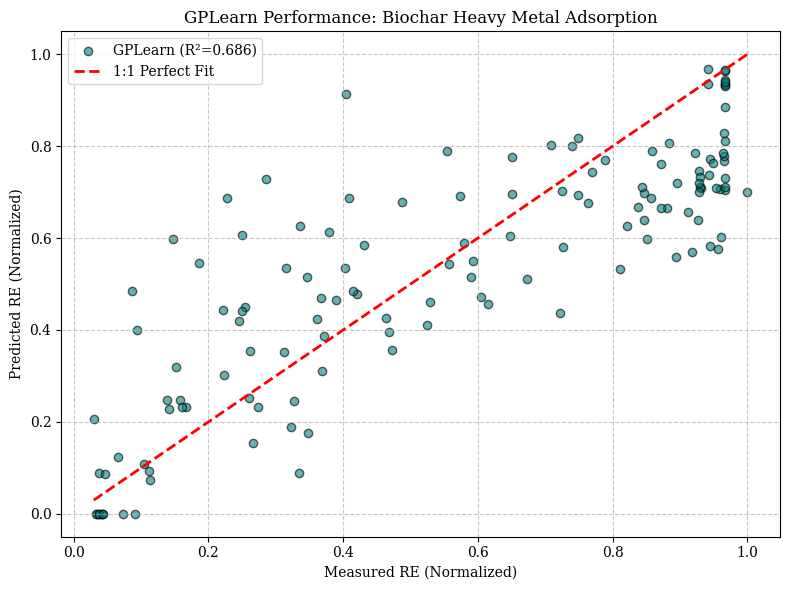


✅ Done! Equation and Figure saved to: ./DiscoEq/Res/gplearn


In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from gplearn.genetic import SymbolicRegressor
from sklearn.metrics import r2_score, mean_squared_error
import warnings

# --- 1. THE SCIKIT-LEARN COMPATIBILITY FIX ---
# This prevents the '_validate_data' and 'n_features_in_' errors
def _patch_validate_data(self, X, y=None, reset=True, validate_separately=False, **check_params):
    self.n_features_in_ = X.shape[1] # Set features count
    return X, y

SymbolicRegressor._validate_data = _patch_validate_data
warnings.filterwarnings("ignore")

# --- 2. SETUP PATHS AND DATA ---
save_path = r'./Res/gplearn'
if not os.path.exists(save_path):
    os.makedirs(save_path)

# Load and clean data (removes empty Excel rows)
trainx = pd.read_excel('./TTV/trainx.xlsx').dropna().astype(float)
trainy = pd.read_excel('./TTV/trainy.xlsx').dropna().astype(float)
testx = pd.read_excel('./TTV/testx.xlsx').dropna().astype(float)
testy = pd.read_excel('./TTV/testy.xlsx').dropna().astype(float)

# Force exact alignment of X and Y rows
X_train = trainx.values[:len(trainy)]
y_train = trainy.values.ravel()[:len(trainx)]
X_test = testx.values[:len(testy)]
y_test = testy.values.ravel()[:len(testx)]

feature_names = list(trainx.columns)
print(f"Data Loaded: {len(X_train)} training samples, {len(X_test)} test samples.")

# --- 3. RUN GPLEARN ---
print("\n>>> Developing Symbolic Equation via GPLearn...")
gp = SymbolicRegressor(
    population_size=10000,          # Size of the "candidate equations" pool
    generations=140,               # Number of evolutionary cycles
    stopping_criteria=0.0001,
    p_crossover=0.7,              # Probability of swapping parts of equations
    p_subtree_mutation=0.1,
    p_hoist_mutation=0.05,
    p_point_mutation=0.1,
    max_samples=0.9,
    verbose=0,                    # Shows progress in console
    function_set=('add', 'sub', 'mul', 'div', 'log', 'sqrt', 'sin', 'cos'),
    metric='rmse',
    random_state=42
)

from gplearn.functions import make_function
import numpy as np

# 1. Define a "Protected" Exponential function to prevent overflow errors
def _protected_exponent(x1):
    with np.errstate(over='ignore'):
        # We clip the input to 100 to prevent 'inf' results which crash the model
        return np.where(np.abs(x1) < 100, np.exp(x1), 0.)

# 2. Create the gplearn function object
exp_func = make_function(function=_protected_exponent, name='exp', arity=1)

# --- Now run your SymbolicRegressor with 'exp_func' instead of the string 'exp' ---

gp = SymbolicRegressor(
    population_size=20000,
    generations=500,
    tournament_size=20,
    stopping_criteria=0.0,
    const_range=(-10., 10.),
    # Use the variable exp_func here, not the string 'exp'
    function_set=('add', 'sub', 'mul', 'div', 'inv', 'log', 'sqrt', 'abs', exp_func),
    parsimony_coefficient=0.0008, 
    p_crossover=0.7,
    p_subtree_mutation=0.1,
    p_hoist_mutation=0.05,
    p_point_mutation=0.1,
    max_samples=0.9,
    verbose=0,
    random_state=42,
    n_jobs=-1
)


gp.fit(X_train, y_train)

# --- 4. EXTRACT AND FORMAT EQUATION ---
y_pred = gp.predict(X_test)
raw_equation = str(gp._program)

# Replace 'X0', 'X1' with actual column names (PHB, Ash, etc.)
final_equation = raw_equation
for i, name in enumerate(feature_names):
    final_equation = final_equation.replace(f'X{i}', name)

print("\n" + "="*50)
print("FINAL DISCOVERED EQUATION (GPLearn):")
print(final_equation)
print("="*50)

# --- 5. RESULTS AND VISUALIZATION ---
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Save Metrics to Table
res_df = pd.DataFrame([{
    'Method': 'GPLearn',
    'R2': round(r2, 4),
    'RMSE': round(rmse, 4),
    'Equation': final_equation
}])
res_df.to_excel(os.path.join(save_path, "GPLearn_Results.xlsx"), index=False)

# Create Parity Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='teal', alpha=0.6, edgecolors='k', label=f'GPLearn (R²={r2:.3f})')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='1:1 Perfect Fit')
plt.xlabel('Measured RE (Normalized)')
plt.ylabel('Predicted RE (Normalized)')
plt.title('GPLearn Performance: Biochar Heavy Metal Adsorption')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Save Figure
plt.savefig(os.path.join(save_path, "GPLearn_Parity_Plot.png"), dpi=300)
plt.show()

print(f"\n✅ Done! Equation and Figure saved to: {save_path}")

Data loaded: 551 train / 138 test samples

>>> Training GPLearn model...

FINAL DISCOVERED EQUATION (GPLearn):
div(div(div(sqrt(sqrt(sqrt(mul(PHS, mul(log(sub(chi, C_m)), r))))), exp(C_0)), exp(C_0)), exp(C_0))
R²   = 0.6411
RMSE = 0.1984


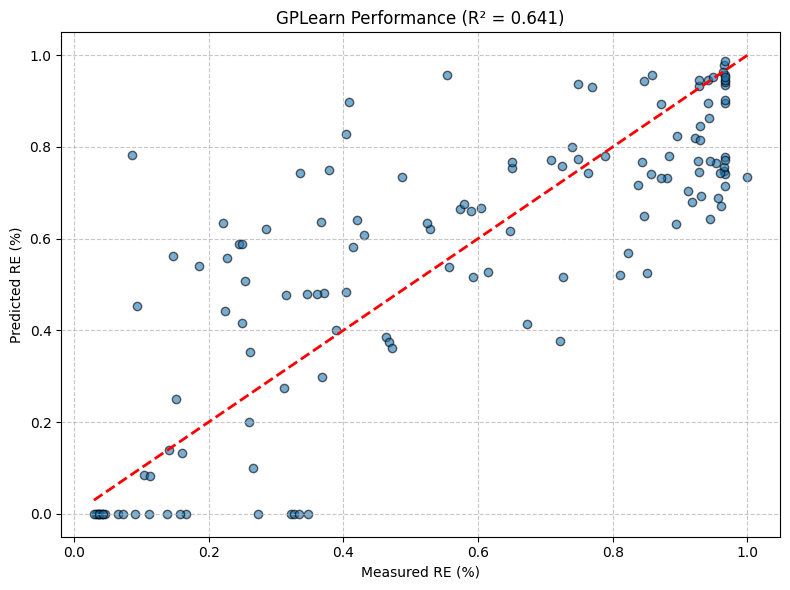


✅ Done! Results saved to: ./Res/gplearn


In [1]:
import os
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from gplearn.genetic import SymbolicRegressor
from gplearn.functions import make_function
from sklearn.metrics import r2_score, mean_squared_error

warnings.filterwarnings("ignore")

# =========================================================
# 1. PATCH FOR SKLEARN COMPATIBILITY
# =========================================================
def _patch_validate_data(self, X, y=None, reset=True,
                         validate_separately=False, **check_params):
    self.n_features_in_ = X.shape[1]
    return X, y

SymbolicRegressor._validate_data = _patch_validate_data

# =========================================================
# 2. PATHS
# =========================================================
save_path = "./Res/gplearn"
os.makedirs(save_path, exist_ok=True)

# =========================================================
# 3. LOAD DATA
# =========================================================
trainx = pd.read_excel("./TTV/trainx.xlsx").dropna().astype(float)
trainy = pd.read_excel("./TTV/trainy.xlsx").dropna().astype(float)
testx  = pd.read_excel("./TTV/testx.xlsx").dropna().astype(float)
testy  = pd.read_excel("./TTV/testy.xlsx").dropna().astype(float)

# =========================================================
# 4. FORCE CORRECT & UNIQUE FEATURE NAMES  (CRITICAL FIX)
# =========================================================
feature_names = [
    "PHB", "Ash", "C_m", "H_m", "N_m", "O_m",
    "ONC", "O_C", "H_C", "HO2NC", "PHS", "C_0", "chi", "r"
]

assert trainx.shape[1] == len(feature_names), \
    "Number of features does not match expected 14 inputs"

trainx.columns = feature_names
testx.columns  = feature_names

# Align X and y safely
X_train = trainx.values[:len(trainy)]
y_train = trainy.values.ravel()[:len(X_train)]

X_test = testx.values[:len(testy)]
y_test = testy.values.ravel()[:len(X_test)]

print(f"Data loaded: {X_train.shape[0]} train / {X_test.shape[0]} test samples")

# =========================================================
# 5. DEFINE PROTECTED EXPONENTIAL
# =========================================================
def _protected_exp(x):
    with np.errstate(over="ignore", invalid="ignore"):
        return np.where(np.abs(x) < 100, np.exp(x), 0.0)

exp_func = make_function(
    function=_protected_exp,
    name="exp",
    arity=1
)

# =========================================================
# 6. RUN GPLearn (WITH FEATURE NAMES PASSED DIRECTLY)
# =========================================================
gp = SymbolicRegressor(
    population_size=5000,
    generations=250,
    tournament_size=25,
    stopping_criteria=0.0,
    const_range=(-10, 10),
    function_set=(
        "add", "sub", "mul", "div",
        "log", "sqrt", "abs", exp_func
    ),
    parsimony_coefficient=0.0008,
    p_crossover=0.7,
    p_subtree_mutation=0.1,
    p_hoist_mutation=0.05,
    p_point_mutation=0.1,
    max_samples=0.9,
    feature_names=feature_names,   # 🔑 FIX
    verbose=0,
    random_state=42,
    n_jobs=-1
)

print("\n>>> Training GPLearn model...")
gp.fit(X_train, y_train)

# =========================================================
# 7. EXTRACT EQUATION (NO REPLACEMENT NEEDED)
# =========================================================
final_equation = str(gp._program)

print("\n" + "=" * 60)
print("FINAL DISCOVERED EQUATION (GPLearn):")
print(final_equation)
print("=" * 60)

# =========================================================
# 8. MODEL PERFORMANCE
# =========================================================
y_pred = gp.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R²   = {r2:.4f}")
print(f"RMSE = {rmse:.4f}")

# =========================================================
# 9. SAVE RESULTS
# =========================================================
res_df = pd.DataFrame([{
    "Method": "GPLearn",
    "R2": round(r2, 4),
    "RMSE": round(rmse, 4),
    "Equation": final_equation
}])

res_df.to_excel(
    os.path.join(save_path, "GPLearn_Results.xlsx"),
    index=False
)

# =========================================================
# 10. PARITY PLOT
# =========================================================
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolors="k")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         "r--", lw=2)

plt.xlabel("Measured RE (%)")
plt.ylabel("Predicted RE (%)")
plt.title(f"GPLearn Performance (R² = {r2:.3f})")
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()

plt.savefig(
    os.path.join(save_path, "GPLearn_Parity_Plot.png"),
    dpi=300
)
plt.show()

print(f"\n✅ Done! Results saved to: {save_path}")


In [ ]:
# import joblib
# save_path = r'./Res/gplearn'
# # Save the trained model
# model_path = os.path.join(save_path, "gplearn_model.joblib")
# joblib.dump(gp, model_path)

# print(f"✅ Trained GPLearn model saved to: {model_path}")

# import joblib
# from gplearn.genetic import SymbolicRegressor

# gp = joblib.load("./Res/gplearn/gplearn_model.joblib")

# # Predict as usual
# y_pred = gp.predict(X_test)



✅ Trained GPLearn model saved to: ./DiscoEq/Res/gplearn/gplearn_model.joblib



FINAL DISCOVERED EQUATION (GPLearn):
div(div(div(sqrt(sqrt(sqrt(mul(PHS, mul(log(sub(chi, C_m)), r))))), exp(C_0)), exp(C_0)), exp(C_0))

================ MODEL PERFORMANCE ================
Train R²   : 0.50780
Test  R²   : 0.64108
Train RMSE: 0.22344
Test  RMSE: 0.19839


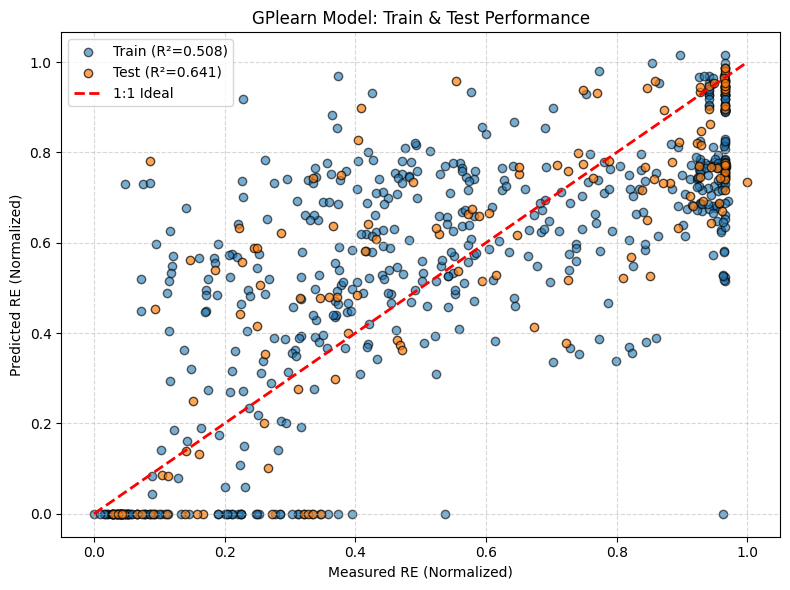


✅ Done! Results saved to:
./Res/gplearn


In [2]:
save_path = r'./Res/gplearn'

# --- 4. EXTRACT AND FORMAT EQUATION ---
y_train_pred = gp.predict(X_train)
y_test_pred = gp.predict(X_test)
raw_equation = str(gp._program)

# Replace 'X0', 'X1' with actual column names (PHB, Ash, etc.)
final_equation = raw_equation
for i, name in enumerate(feature_names):
    final_equation = final_equation.replace(f'X{i}', name)

print("\n" + "="*50)
print("FINAL DISCOVERED EQUATION (GPLearn):")
print(final_equation)
print("="*50)


pd.DataFrame(y_train_pred).to_csv(f"{save_path}/gplearn_train.csv", index=False)
pd.DataFrame(y_test_pred).to_csv(f"{save_path}/gplearn_test.csv", index=False)


# --- 5. METRICS ---
r2_train   = r2_score(y_train.ravel(), y_train_pred)
r2_test    = r2_score(y_test, y_test_pred)
rmse_train = np.sqrt(mean_squared_error(y_train.ravel(), y_train_pred))
rmse_test  = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("\n================ MODEL PERFORMANCE ================")
print(f"Train R²   : {r2_train:.5f}")
print(f"Test  R²   : {r2_test:.5f}")
print(f"Train RMSE: {rmse_train:.5f}")
print(f"Test  RMSE: {rmse_test:.5f}")
print("===================================================")



# --- 6. SAVE RESULTS ---
res_df = pd.DataFrame([{
    'Method': 'PySINDy',
    'Train_R2': round(r2_train, 5),
    'Test_R2': round(r2_test, 5),
    'Train_RMSE': round(rmse_train, 5),
    'Test_RMSE': round(rmse_test, 5),
    'Equation': final_equation
}])

res_df.to_excel(os.path.join(save_path, "gplearn_Train_Test_Results.xlsx"), index=False)

# --- 8. PARITY PLOT (TRAIN + TEST) ---
plt.figure(figsize=(8, 6))

plt.scatter(
    y_train, y_train_pred,
    alpha=0.6, edgecolors='k',
    label=f'Train (R²={r2_train:.3f})'
)

plt.scatter(
    y_test, y_test_pred,
    alpha=0.7, edgecolors='k',
    label=f'Test (R²={r2_test:.3f})'
)

lims = [
    min(y_train.min(), y_test.min()),
    max(y_train.max(), y_test.max())
]

plt.plot(lims, lims, 'r--', lw=2, label='1:1 Ideal')

plt.xlabel('Measured RE (Normalized)')
plt.ylabel('Predicted RE (Normalized)')
plt.title('GPlearn Model: Train & Test Performance')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

plt.savefig(os.path.join(save_path, "gplearn_Train_Test_Parity.png"), dpi=300)
plt.show()

print(f"\n✅ Done! Results saved to:\n{save_path}")


In [19]:
raw = str(gp._program)
import sympy as sp

sympy_locals = {
    'add': lambda a, b: a + b,
    'sub': lambda a, b: a - b,
    'mul': lambda a, b: a * b,
    'div': lambda a, b: a / b,
    'sqrt': sp.sqrt,
    'abs': sp.Abs,
    'log': sp.log,
    'sin': sp.sin,
    'cos': sp.cos,
}
X = sp.symbols(f'X0:{len(feature_names)}')
symbol_map = {f'X{i}': X[i] for i in range(len(feature_names))}
expr = sp.sympify(raw, locals=sympy_locals)
expr_named = expr.subs({
    X[i]: sp.Symbol(feature_names[i])
    for i in range(len(feature_names))
})
expr_simplified = sp.simplify(expr_named)
print(expr_simplified)
print("***********")
from sympy import latex
print(latex(expr_simplified))


Abs(C_m*(sqrt(C0) + C_m - (Ash - C0 + χ)**(1/8)) - sqrt(-sqrt(C_m*PHS)*(C0 - r**(1/4))))
***********
\left|{C_{m} \left(\sqrt{C_{0}} + C_{m} - \sqrt[8]{Ash - C_{0} + χ}\right) - \sqrt{- \sqrt{C_{m} PHS} \left(C_{0} - \sqrt[4]{r}\right)}}\right|


In [ ]:
# import sklearn
# print("scikit-learn version:", sklearn.__version__)
# scikit-learn version: 1.7.2